ECE 508 Final Project - Real-Time 2D Object Detection (SSD)

Remember to connect a GPU before running the code

**Step 1. Mount your Google drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Step 2.1 Set your project path**

In [ ]:
# atsm
# %cd /content/drive/MyDrive/School/ECE508/obj_ssd

# amaliwat
%cd /content/drive/MyDrive/School/F23/ECE508/FinalProject/obj_ssd

/content/drive/.shortcut-targets-by-id/1sSNJYu_WUevBjhJpNYRKL2co0_ainGZI/obj_ssd


**Step 2.2 Copy your dataset from your Google Drive to the cloud-based storage**

Note: it helps accelerate fetching data when training, but all data stored on the cloud will be removed when closing the webpage

In [ ]:
# atsm
# !cp -a '/content/drive/MyDrive/School/ECE508/obj_ssd/data.zip' '/content'

# amaliwat
!cp -a '/content/drive/MyDrive/School/F23/ECE508/FinalProject/obj_ssd/data.zip' '/content'

**Step 2.3 Unzip the dataset**

command "-q" hides the printing results

In [ ]:
!unzip -q /content/data.zip -d /content

**Step 3. Train MobileNetv1-SSD-lite model using the PASCAL VOC dataset**

**(Optional)** remove the existing trained models if you need

In [ ]:
# optinal
!rm -f models/*

Train SSD-MobileNetV1-Lite model from begining

100 epochs need ~200 mins in  total

In [ ]:
# for testing mods, 40 or 50 epochs will do
!python train_ssd.py \
    --dataset_type voc  \
    --datasets /content/data/VOC2012 \
    --validation_dataset /content/data/VOC2012 \
    --net mb1-ssd-lite \
    --base_net mobilenet_v1_with_relu_69_5.pth  \
    --scheduler cosine \
    --lr 0.02 \
    --t_max 200 \
    --validation_epochs 10 \
    --num_epochs 40

**(Optional)** resume training from the last saved trained model in case the training is interrupted.

make sure the parameters of "resume" and "last_epoch" are correct before resuming the training

In [ ]:
#resume train
!python train_ssd.py \
    --dataset_type voc  \
    --datasets /content/data/VOC2012 \
    --validation_dataset /content/data/VOC2012 \
    --net mb1-ssd-lite \
    --scheduler cosine \
    --lr 0.02 \
    --t_max 200 \
    --validation_epochs 20 \
    --num_epochs 100 \
    --resume models/mb1-ssd-lite-Epoch-60.pth \
    --last_epoch 60

2023-11-05 17:20:09,321 - root - INFO - Use Cuda.
2023-11-05 17:20:09,321 - root - INFO - Namespace(dataset_type='voc', datasets=['/content/data/VOC2012'], validation_dataset='/content/data/VOC2012', balance_data=False, net='mb1-ssd-lite', freeze_base_net=False, freeze_net=False, mb2_width_mult=1.0, lr=0.02, momentum=0.9, weight_decay=0.0005, gamma=0.1, base_net_lr=None, extra_layers_lr=None, base_net=None, pretrained_ssd=None, resume='models/mb1-ssd-lite-Epoch-60.pth', scheduler='cosine', milestones='80,100', t_max=200.0, batch_size=32, num_epochs=100, num_workers=8, validation_epochs=20, debug_steps=85, last_epoch=60, use_cuda=True, checkpoint_folder='models/')
2023-11-05 17:20:09,364 - root - INFO - Prepare training datasets.
2023-11-05 17:20:09,365 - root - INFO - No labels file, using default VOC classes.
2023-11-05 17:20:09,663 - root - INFO - Stored labels into file voc-model-labels.txt.
2023-11-05 17:20:09,663 - root - INFO - Train dataset size: 5717
/usr/local/lib/python3.10/d

**Step 4.1 Evaluate mAP**

In [ ]:
import pandas as pd
data = {'average_precision':[0.4590], 'average_inference_time':[0.0081], 'average_fps':[122.87], 'note': 'base'}
new_run = pd.DataFrame.from_dict(data)
print(new_run)
new_run.to_csv('/content/drive/MyDrive/School/F23/ECE508/FinalProject/obj_ssd/test.csv', index=False)

   average_precision  average_inference_time  average_fps  note
0              0.459                  0.0081       122.87  base


In [ ]:
old_runs = pd.read_csv('/content/drive/MyDrive/School/F23/ECE508/FinalProject/obj_ssd/test.csv')
print(old_runs)

   average_precision  average_inference_time  average_fps  note
0              0.459                  0.0081       122.87  base


In [ ]:
old_runs = pd.read_csv('/content/drive/MyDrive/School/F23/ECE508/FinalProject/obj_ssd/test.csv')
print(old_runs)
data = {'average_precision':[0.5], 'average_inference_time':[0.1], 'average_fps':[12.87], 'note': 'test'}
new_run = pd.DataFrame.from_dict(data)
new_csv = pd.concat([old_runs,new_run], ignore_index=True)
new_csv.to_csv('/content/drive/MyDrive/School/F23/ECE508/FinalProject/obj_ssd/test.csv', index=False)

   average_precision  average_inference_time  average_fps  note
0              0.459                  0.0081       122.87  base
1              0.500                  0.1000        12.87  test
2              0.500                  0.1000        12.87  test


In [5]:
!python eval_ssd.py \
    --net mb1-ssd-lite \
    --dataset /content/data/VOC2012 \
    --trained_model models/mb1-ssd-lite-Epoch-99.pth \
    --label_file voc-model-labels.txt \
    --csv /content/drive/MyDrive/School/F23/ECE508/FinalProject/obj_ssd/test.csv \
    --implementation_note base

/content/drive/.shortcut-targets-by-id/1sSNJYu_WUevBjhJpNYRKL2co0_ainGZI/obj_ssd/eval_ssd.py:71: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  all_gt_boxes[class_index][image_id] = torch.tensor(all_gt_boxes[class_index][image_id])
It took 0.07534432411193848 seconds to load the model.


Average Precision Per-class:
aeroplane: 0.6615
bicycle: 0.5469
bird: 0.4291
boat: 0.2288
bottle: 0.1908
bus: 0.6472
car: 0.4424
cat: 0.7362
chair: 0.2691
cow: 0.3387
diningtable: 0.3812
dog: 0.6363
horse: 0.5086
motorbike: 0.5525
person: 0.5958
pottedplant: 0.1807
sheep: 0.4320
sofa: 0.4100
train: 0.5902
tvmonitor: 0.4031

Average Precision Across All Classes: 0.4590

Average Inference Time per Image: 0.0067

Average FPS per Image: 149.11


**Step 4.2 Visualization**  
four parameters:  
1. input image (you can test any images from the PASCAL val dataset)  
2. trained model  
3. model type (default: mb1-ssd-lite)  
4. IoU Threshold (default 0.5)

Loading Trained Model is Done!

Starting Detection...

Inference time:  1.41994309425354
Time: 1.43s, Detect Objects: 1.
(500, 486, 3)


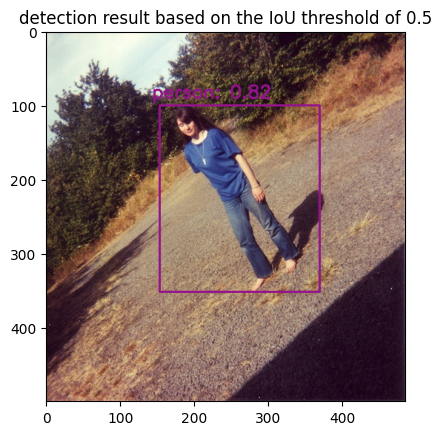

<Figure size 640x480 with 0 Axes>

result saved to the outputs folder !


In [6]:
!CUDA_VISIBLE_DEVICES=''
%run run_ssd_example.py \
    2007_000027.jpg \
    models/mb1-ssd-lite-Epoch-99.pth \
    mb1-ssd-lite \
    0.5